## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [82]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [83]:
# Your code here . . .
temp = euk
temp["Number of genes"] = pd.to_numeric(euk["Number of genes"], errors="coerce")
temp[(temp.Class == "Mammals") & (temp["Number of genes"] >= 20000)]
print(len(temp), " with >= 20000 genes")
# Scientific names can be found from the code below:
temp.Species.to_list()

8302  with >= 20000 genes


['Emiliania huxleyi CCMP1516',
 'Arabidopsis thaliana',
 'Glycine max',
 'Medicago truncatula',
 'Solanum lycopersicum',
 'Hordeum vulgare',
 'Oryza sativa Japonica Group',
 'Triticum aestivum',
 'Saccharomyces cerevisiae S288C',
 'Zea mays',
 'Pneumocystis carinii B80',
 'Schizosaccharomyces pombe',
 'Aspergillus nidulans FGSC A4',
 'Aspergillus fumigatus Af293',
 'Phanerochaete chrysosporium',
 'Candida albicans SC5314',
 'Neurospora crassa OR74A',
 'Leishmania major strain Friedlin',
 'Trypanosoma brucei gambiense DAL972',
 'Trypanosoma cruzi',
 'Giardia lamblia ATCC 50803',
 'Entamoeba histolytica HM-1:IMSS',
 'Eimeria tenella',
 'Cryptosporidium parvum Iowa II',
 'Toxoplasma gondii ME49',
 'Plasmodium berghei ANKA',
 'Plasmodium chabaudi chabaudi',
 'Plasmodium falciparum 3D7',
 'Plasmodium knowlesi strain H',
 'Plasmodium vivax',
 'Babesia bovis',
 'Theileria annulata',
 'Theileria parva',
 'Encephalitozoon cuniculi GB-M1',
 'Caenorhabditis briggsae',
 'Caenorhabditis elegans',
 

### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [84]:
# Your code here . . .
euk.Class.value_counts()

,count
Class,
Ascomycetes,3570
Land Plants,781
Basidiomycetes,726
Mammals,658
Insects,602
Other Protists,357
Fishes,282
Apicomplexans,254
Other Animals,210


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [85]:
# Your code here . . .
euk.groupby("Class").Species.nunique()

,Species
Class,
Amphibians,6
Apicomplexans,131
Ascomycetes,1859
Basidiomycetes,523
Birds,144
Fishes,218
Flatworms,34
Green Algae,76
Insects,402


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [86]:
# Your code here . . .
euk[(euk.Class == "Mammals") & (euk.Species.str.split().str[0] == "Macaca")] # splits scientific name and gets first value before space with str[0]

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
119,Macaca mulatta,Animals,Mammals,3236.2200,41.2014,33215.0,55363,2014,Chromosome
306,Macaca fascicularis,Animals,Mammals,2946.8400,41.3398,33107.0,62703,2013,Chromosome
1116,Macaca nemestrina,Animals,Mammals,2948.7000,41.3,40715.0,66484,2015,Scaffold
1845,Macaca fuscata fuscata,Animals,Mammals,2930.7100,40.9,NaN,-,2018,Contig
4856,Macaca fascicularis,Animals,Mammals,2878.4700,41.2655,NaN,-,2011,Chromosome
4948,Macaca mulatta,Animals,Mammals,3097.3900,38.0268,NaN,-,2006,Chromosome
5087,Macaca mulatta,Animals,Mammals,2969.9700,41.8692,21524.0,17802,2011,Chromosome
5152,Macaca fascicularis,Animals,Mammals,3126.5600,42.0609,21132.0,17456,2011,Chromosome
5646,Macaca mulatta,Animals,Mammals,2971.3100,41.1015,NaN,-,2015,Chromosome
5740,Macaca mulatta,Animals,Mammals,11.7537,40.1,NaN,-,2015,Chromosome


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [87]:
# Your code here . . .
euk["Species"] = euk.Species.str.split().str[0:2].str.join(" ")
df_species = euk[["Species", "Kingdom", "Class", "Size (Mb)", "Number of genes", "Number of proteins"]]
df_species

,Species,Kingdom,Class,Size (Mb),Number of genes,Number of proteins
0,Emiliania huxleyi,Protists,Other Protists,167.676000,38549.0,38554
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,38311.0,48265
2,Glycine max,Plants,Land Plants,979.046000,59847.0,71219
3,Medicago truncatula,Plants,Land Plants,412.924000,37603.0,41939
4,Solanum lycopersicum,Plants,Land Plants,828.349000,31200.0,37660
...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,NaN,-
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,155.0,298
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,NaN,-
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,NaN,-


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [98]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
df = euk[euk.Kingdom == "Animals"].groupby("Class").Species.nunique()

,Species
Class,
Amphibians,6
Birds,140
Fishes,217
Flatworms,34
Insects,360
Mammals,296
Other Animals,169
Reptiles,38
Roundworms,111


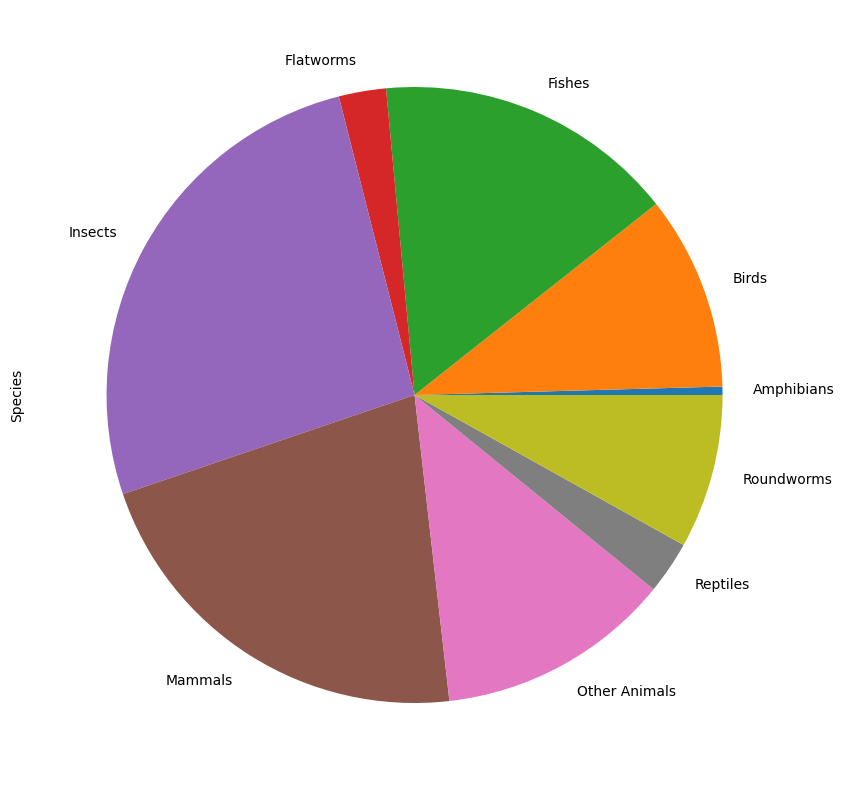

In [108]:
# Create a panda pie plot using the dataframe above

# Your code here . . .
pie = df.plot.pie(y="Animals", figsize=(10,10))